# **Importing the Dependencies**

In [ ]:
# Step 1: Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


# **Load Dataset**

In [ ]:
df = pd.read_csv("/content/online_shoppers_intention.csv")
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


In [ ]:
print("Shape :",df.shape)

Shape : (12330, 18)


In [ ]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [ ]:
df.tail()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False
12329,0,0.0,0,0.0,3,21.250000,0.000000,0.066667,0.000000,0.0,Nov,3,2,1,2,New_Visitor,True,False


In [ ]:

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [ ]:
print(df.describe())

       Administrative  Administrative_Duration  Informational  \
count    12330.000000             12330.000000   12330.000000   
mean         2.315166                80.818611       0.503569   
std          3.321784               176.779107       1.270156   
min          0.000000                 0.000000       0.000000   
25%          0.000000                 0.000000       0.000000   
50%          1.000000                 7.500000       0.000000   
75%          4.000000                93.256250       0.000000   
max         27.000000              3398.750000      24.000000   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
count            12330.000000    12330.000000             12330.000000   
mean                34.472398       31.731468              1194.746220   
std                140.749294       44.475503              1913.669288   
min                  0.000000        0.000000                 0.000000   
25%                  0.000000        7.00000

# **Exploratory Data Analysis(EDA)**

/tmp/ipython-input-3253592993.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Revenue', palette='Set2')


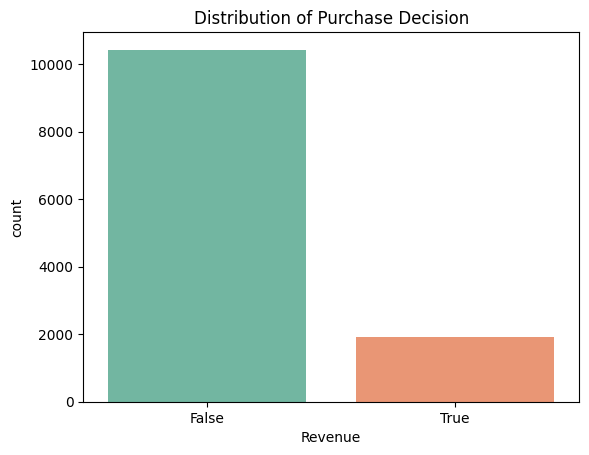

In [ ]:
# Distribution of Purchase Decision
sns.countplot(data=df, x='Revenue', palette='Set2')
plt.title("Distribution of Purchase Decision")
plt.show()

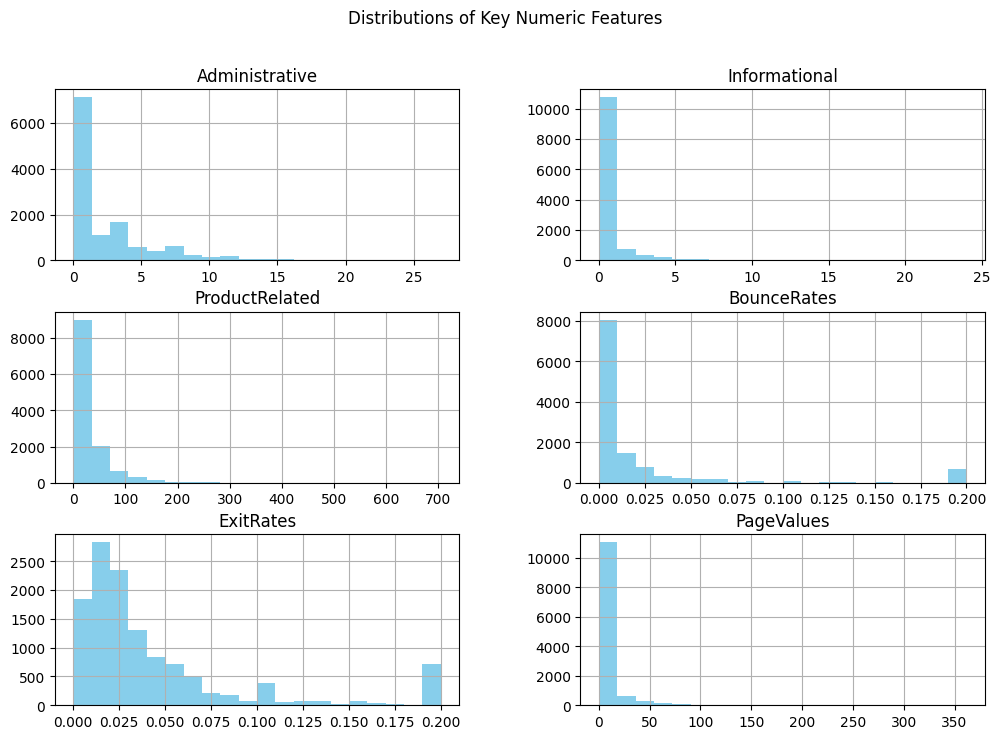

In [ ]:
# Distibution of Key Numeric Features
num_cols = ['Administrative', 'Informational', 'ProductRelated',
            'BounceRates', 'ExitRates', 'PageValues']

df[num_cols].hist(bins=20, figsize=(12,8), color='skyblue')
plt.suptitle("Distributions of Key Numeric Features")
plt.show()

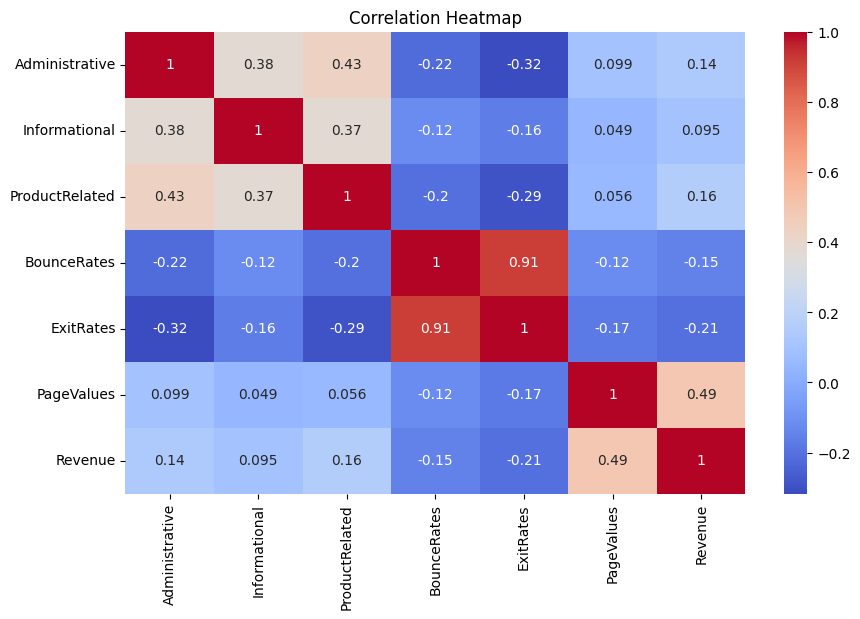

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df[num_cols + ['Revenue']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


# **Data Preprocessing**

In [ ]:
print(df.isnull().sum())

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64


In [ ]:
# Encode Categorical Variables
cat_cols = ['Month','VisitorType','Weekend']
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [ ]:
# Split Features & Target
X = df.drop('Revenue', axis=1)
y = df['Revenue']

In [ ]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
#  Scale Numeric Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# **Model Training**

**i)KNeighhborsClassifier**

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))

KNN Accuracy: 0.8678021086780211


**ii)DecisionTreeClassifier**

In [ ]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))

Decision Tree Accuracy: 0.8532035685320357


**iii)RandomForestClassifier**

In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

Random Forest Accuracy: 0.9006488240064883


**iv)LogisticRegression**

In [ ]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.8832116788321168


In [ ]:
models = {
    "KNN": KNeighborsClassifier(n_neighbors=5),  # default k=5, can tune later
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=2000)
}

# Dictionary to store accuracies
accuracies = {}

# Loop over models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    accuracies[name] = acc  # store accuracy

    print(f"🔹 {name} Results 🔹")
    print("Accuracy:", acc)
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("="*50)


🔹 KNN Results 🔹
Accuracy: 0.8678021086780211
Classification Report:
               precision    recall  f1-score   support

       False       0.89      0.96      0.92      2084
        True       0.62      0.37      0.47       382

    accuracy                           0.87      2466
   macro avg       0.76      0.67      0.70      2466
weighted avg       0.85      0.87      0.85      2466

🔹 Decision Tree Results 🔹
Accuracy: 0.8532035685320357
Classification Report:
               precision    recall  f1-score   support

       False       0.92      0.91      0.91      2084
        True       0.53      0.55      0.54       382

    accuracy                           0.85      2466
   macro avg       0.72      0.73      0.72      2466
weighted avg       0.86      0.85      0.85      2466

🔹 Random Forest Results 🔹
Accuracy: 0.9006488240064883
Classification Report:
               precision    recall  f1-score   support

       False       0.92      0.96      0.94      2084
        Tr

# **Hyperparameter Tuning**

In [ ]:
knn = KNeighborsClassifier()
param_knn = {
    'n_neighbors': [3,5,7,9],
    'weights': ['uniform','distance'],
    'metric': ['euclidean','manhattan']
}

grid_knn = GridSearchCV(knn, param_grid=param_knn, cv=5, scoring='accuracy')
grid_knn.fit(X_train, y_train)

knn_best = grid_knn.best_estimator_
knn_pred = knn_best.predict(X_test)

print("Best KNN Params:", grid_knn.best_params_)
print("KNN Accuracy:", accuracy_score(y_test, knn_pred))

Best KNN Params: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}
KNN Accuracy: 0.8775344687753447


In [ ]:
dt = DecisionTreeClassifier(random_state=42)
param_dt = {
    'max_depth': [5,10,15,None],
    'min_samples_split': [2,5,10],
    'criterion': ['gini','entropy']
}

grid_dt = GridSearchCV(dt, param_grid=param_dt, cv=5, scoring='accuracy')
grid_dt.fit(X_train, y_train)

dt_best = grid_dt.best_estimator_
dt_pred = dt_best.predict(X_test)

print("Best DT Params:", grid_dt.best_params_)
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_pred))

Best DT Params: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 2}
Decision Tree Accuracy: 0.8998377939983779


In [ ]:
rf = RandomForestClassifier(random_state=42)
param_rf = {
    'n_estimators': [100,200],
    'max_depth': [5,10,15,None],
    'min_samples_split': [2,5,10]
}

grid_rf = GridSearchCV(rf, param_grid=param_rf, cv=5, scoring='accuracy')
grid_rf.fit(X_train, y_train)

rf_best = grid_rf.best_estimator_
rf_pred = rf_best.predict(X_test)

print("Best RF Params:", grid_rf.best_params_)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))

Best RF Params: {'max_depth': 15, 'min_samples_split': 2, 'n_estimators': 200}
Random Forest Accuracy: 0.9006488240064883


In [ ]:
lr = LogisticRegression(max_iter=2000)
param_lr = {
    'C': [0.01,0.1,1,10],
    'solver': ['lbfgs','liblinear']
}

grid_lr = GridSearchCV(lr, param_grid=param_lr, cv=5, scoring='accuracy')
grid_lr.fit(X_train, y_train)

lr_best = grid_lr.best_estimator_
lr_pred = lr_best.predict(X_test)

print("Best LR Params:", grid_lr.best_params_)
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_pred))

Best LR Params: {'C': 10, 'solver': 'lbfgs'}
Logistic Regression Accuracy: 0.8832116788321168


In [ ]:
results = {
    "KNN": accuracy_score(y_test, knn_pred),
    "Decision Tree": accuracy_score(y_test, dt_pred),
    "Random Forest": accuracy_score(y_test, rf_pred),
    "Logistic Regression": accuracy_score(y_test, lr_pred)
}

print("Model Accuracies:", results)

Model Accuracies: {'KNN': 0.8775344687753447, 'Decision Tree': 0.8998377939983779, 'Random Forest': 0.9006488240064883, 'Logistic Regression': 0.8832116788321168}


#**Evaluate Tuned Models**

In [ ]:
def plot_cm(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {title}")
    plt.show()

KNN Classification Report
              precision    recall  f1-score   support

       False       0.89      0.97      0.93      2084
        True       0.69      0.37      0.49       382

    accuracy                           0.88      2466
   macro avg       0.79      0.67      0.71      2466
weighted avg       0.86      0.88      0.86      2466



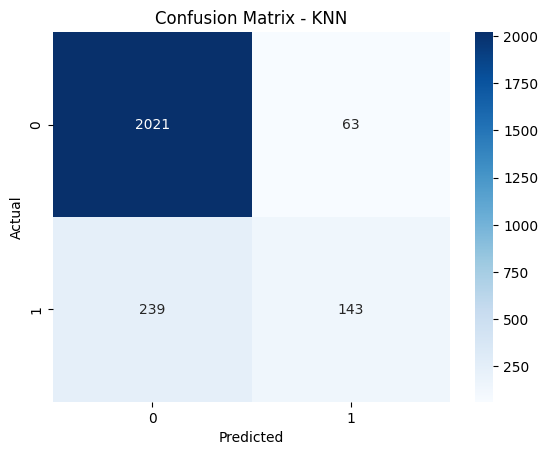

---------------------------------------------------------------
Decision Tree Classification Report
              precision    recall  f1-score   support

       False       0.93      0.96      0.94      2084
        True       0.71      0.59      0.65       382

    accuracy                           0.90      2466
   macro avg       0.82      0.78      0.79      2466
weighted avg       0.89      0.90      0.90      2466



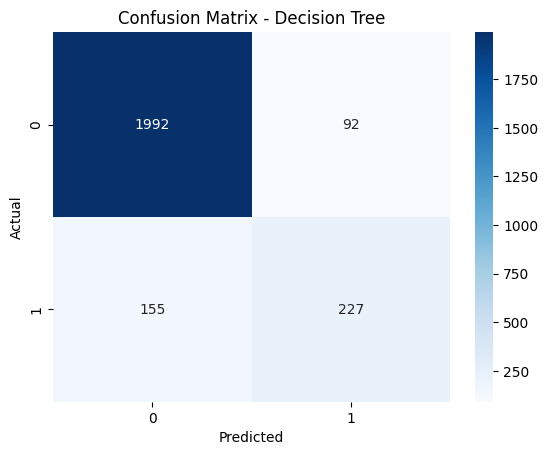

---------------------------------------------------------------
Random Forest Classification Report
              precision    recall  f1-score   support

       False       0.92      0.96      0.94      2084
        True       0.74      0.56      0.64       382

    accuracy                           0.90      2466
   macro avg       0.83      0.76      0.79      2466
weighted avg       0.89      0.90      0.89      2466



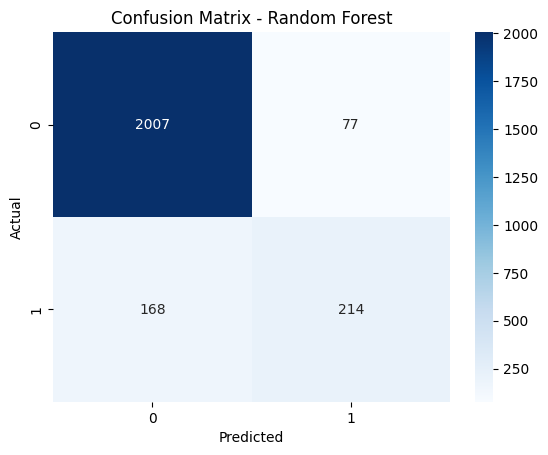

---------------------------------------------------------------
Logistic Regression Classification Report
              precision    recall  f1-score   support

       False       0.89      0.98      0.93      2084
        True       0.76      0.36      0.49       382

    accuracy                           0.88      2466
   macro avg       0.83      0.67      0.71      2466
weighted avg       0.87      0.88      0.86      2466



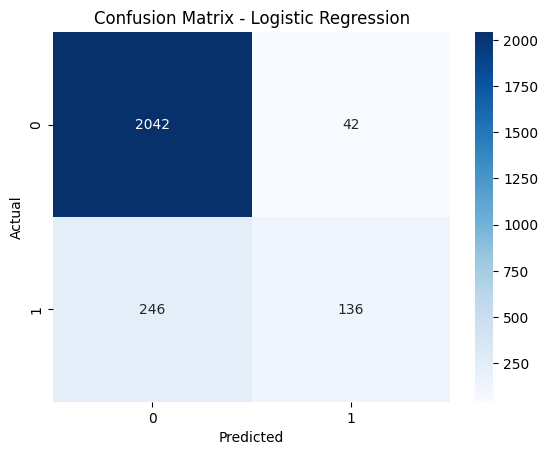

In [ ]:
# KNN
print("KNN Classification Report")
print(classification_report(y_test, knn_pred))
plot_cm(y_test, knn_pred, "KNN")

print("---------------------------------------------------------------")

# Decision Tree
print("Decision Tree Classification Report")
print(classification_report(y_test, dt_pred))
plot_cm(y_test, dt_pred, "Decision Tree")

print("---------------------------------------------------------------")

# Random Forest
print("Random Forest Classification Report")
print(classification_report(y_test, rf_pred))
plot_cm(y_test, rf_pred, "Random Forest")

print("---------------------------------------------------------------")

# Logistic Regression
print("Logistic Regression Classification Report")
print(classification_report(y_test, lr_pred))
plot_cm(y_test, lr_pred, "Logistic Regression")

# **Accuracy Comparison Chart**


✅ Best Model: Random Forest with Accuracy = 0.9006


/tmp/ipython-input-1876744720.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=list(results.keys()), y=list(results.values()), palette="magma")


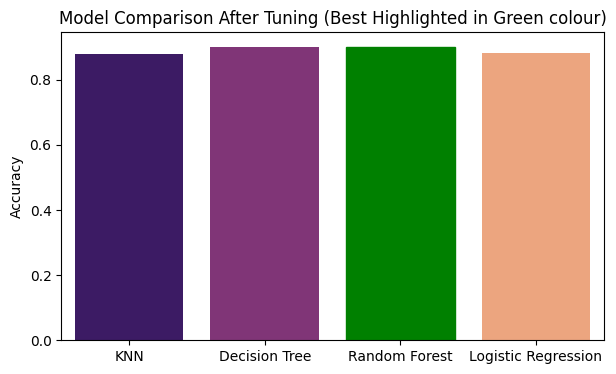

In [ ]:
# Identify best model
best_model_name = max(results, key=results.get)
best_model_acc = results[best_model_name]
print(f"\n✅ Best Model: {best_model_name} with Accuracy = {best_model_acc:.4f}")

# Bar chart highlighting best model
plt.figure(figsize=(7,4))
bars = sns.barplot(x=list(results.keys()), y=list(results.values()), palette="magma")
for i, model in enumerate(results.keys()):
    if model == best_model_name:
        bars.patches[i].set_color('green')
plt.ylabel("Accuracy")
plt.title("Model Comparison After Tuning (Best Highlighted in Green colour)")
plt.show()